In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WC-stats.csv')

In [3]:
df.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615,2
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923,1
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923,9
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308,5
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769,5


In [5]:
df.shape

(115, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goals_z          115 non-null    float64
 1   xg_z             115 non-null    float64
 2   crosses_z        115 non-null    float64
 3   boxtouches_z     115 non-null    float64
 4   passes_z         115 non-null    float64
 5   progpasses_z     115 non-null    float64
 6   takeons_z        115 non-null    float64
 7   progruns_z       115 non-null    float64
 8   tackles_z        115 non-null    float64
 9   interceptions_z  115 non-null    float64
 10  clearances_z     115 non-null    float64
 11  blocks_z         115 non-null    float64
 12  aerials_z        115 non-null    float64
 13  fouls_z          115 non-null    float64
 14  fouled_z         115 non-null    float64
 15  nsxg_z           115 non-null    float64
 16  results          115 non-null    int64  
dtypes: float64(16), 

In [7]:
df.corr()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
goals_z,1.000000,0.585493,0.054663,0.248932,0.298461,0.155753,0.237338,0.218104,0.371657,0.289070,-0.113795,0.121577,0.042549,-0.174688,-0.009005,0.341141,-0.682428
xg_z,0.585493,1.000000,0.398390,0.659253,0.387879,0.184738,0.309114,0.437528,0.397830,0.311220,-0.369458,0.140070,0.034022,-0.168606,-0.018568,0.674899,-0.384902
crosses_z,0.054663,0.398390,1.000000,0.644008,0.256583,0.300881,0.052133,0.272081,0.201907,0.259362,-0.180750,0.096508,0.218019,0.001522,0.082082,0.662861,0.066175
boxtouches_z,0.248932,0.659253,0.644008,1.000000,0.407707,0.254182,0.183017,0.481106,0.391493,0.338852,-0.396161,0.277398,0.222978,-0.158177,0.060833,0.888903,-0.205007
passes_z,0.298461,0.387879,0.256583,0.407707,1.000000,0.718822,0.405944,0.665386,0.741805,0.692621,-0.187100,0.356612,-0.069773,-0.201433,0.208142,0.551730,-0.243741
progpasses_z,0.155753,0.184738,0.300881,0.254182,0.718822,1.000000,0.180539,0.414736,0.505673,0.493459,0.006178,0.316682,-0.022700,0.063301,0.039619,0.407430,-0.078513
takeons_z,0.237338,0.309114,0.052133,0.183017,0.405944,0.180539,1.000000,0.584575,0.393275,0.428885,-0.021148,0.319262,-0.035863,0.024021,0.276897,0.302105,-0.185950
progruns_z,0.218104,0.437528,0.272081,0.481106,0.665386,0.414736,0.584575,1.000000,0.613783,0.516031,-0.127049,0.397040,0.002578,-0.075371,0.298909,0.604695,-0.230441
tackles_z,0.371657,0.397830,0.201907,0.391493,0.741805,0.505673,0.393275,0.613783,1.000000,0.681467,-0.230942,0.311808,-0.028979,-0.175485,0.261650,0.504659,-0.334176
interceptions_z,0.289070,0.311220,0.259362,0.338852,0.692621,0.493459,0.428885,0.516031,0.681467,1.000000,-0.141929,0.239774,0.035030,-0.091645,0.291861,0.459174,-0.239057


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,115.0,0.181485,0.283242,-0.410000,-0.035385,0.158462,0.392308,0.881538
xg_z,115.0,0.241291,0.261341,-0.292308,0.080769,0.222308,0.391538,1.015385
crosses_z,115.0,0.133806,0.230102,-0.286154,-0.032692,0.086923,0.295000,0.853846
boxtouches_z,115.0,0.250154,0.277617,-0.313077,0.065000,0.223846,0.415769,1.153077
passes_z,115.0,0.141719,0.365101,-0.704615,-0.081923,0.090769,0.348077,1.410769
progpasses_z,115.0,-0.017204,0.240718,-0.463846,-0.193846,-0.015385,0.113846,0.666923
takeons_z,115.0,0.157030,0.288193,-0.473077,-0.011538,0.135385,0.333077,0.940769
progruns_z,115.0,0.181926,0.387522,-0.499231,-0.070385,0.105385,0.426154,1.432308
tackles_z,115.0,0.146990,0.395445,-0.722308,-0.125385,0.105385,0.380000,1.146154
interceptions_z,115.0,0.126910,0.394403,-0.649231,-0.158846,0.061538,0.363462,1.215385


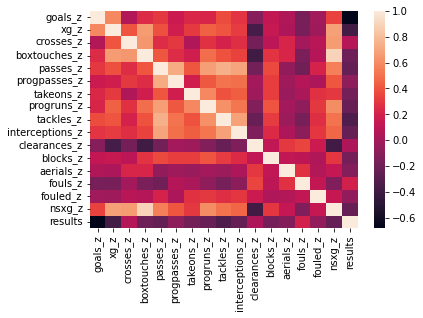

In [13]:
sns.heatmap(df.corr());

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_69093/2528632801.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


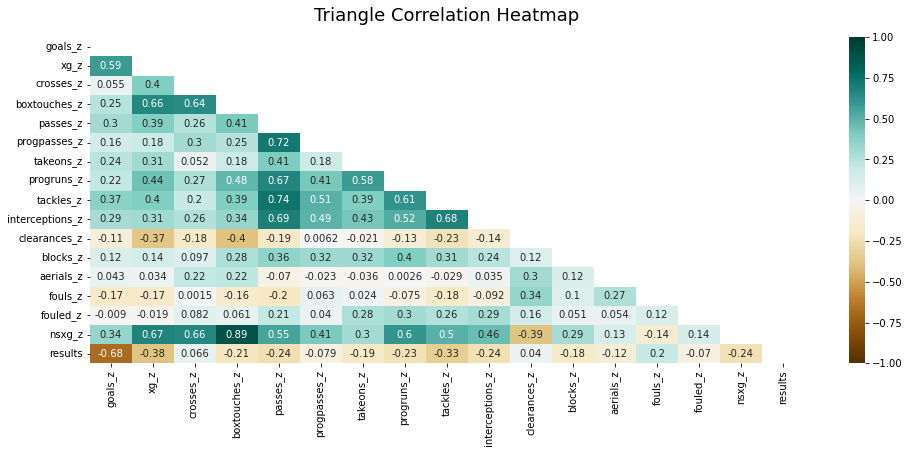

In [14]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

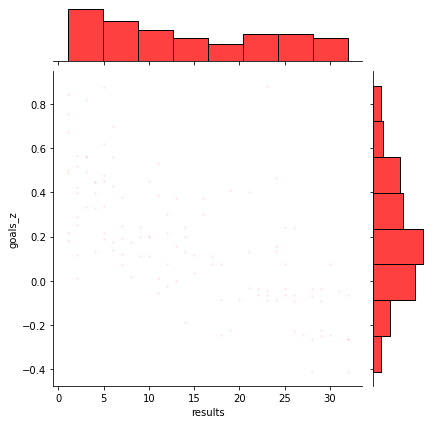

In [15]:
sns.jointplot(x=df['results'],y=df['goals_z'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

In [16]:
y = df['results']


In [17]:
X = df.drop(columns=['results'])

In [18]:
X.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769


In [21]:
import matplotlib.pyplot as plt
from scipy import stats


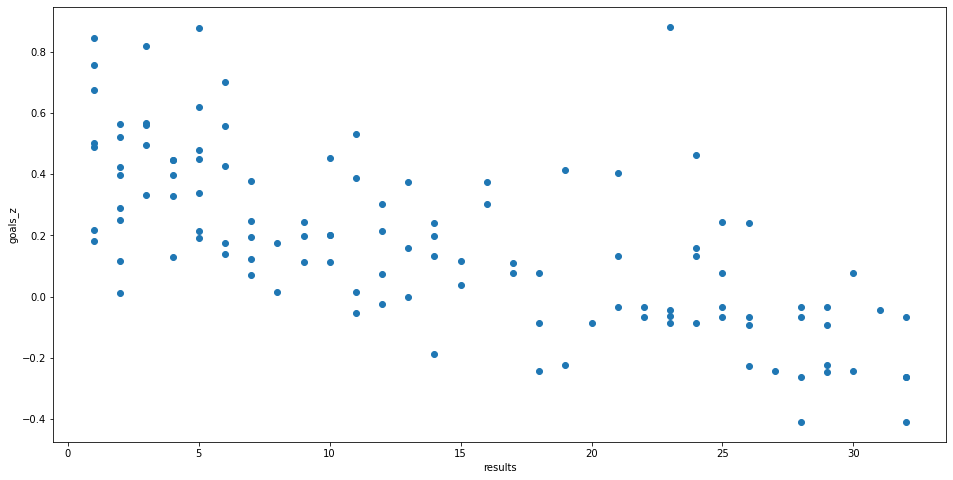

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['results'], df['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

In [22]:
z = np.abs(stats.zscore(X))
print(z)

      goals_z      xg_z  crosses_z  boxtouches_z  passes_z  progpasses_z  \
0    0.856687  0.362671   1.178351      1.013553  0.790931      0.229050   
1    0.125664  0.411874   0.446389      0.331729  1.908241      2.687566   
2    0.239848  0.580382   2.031538      0.953998  1.901893      1.763216   
3    1.055809  1.414053   0.409805      0.725795  1.730487      0.248308   
4    2.468756  2.046698   1.286146      1.479977  1.686049      1.471146   
..        ...       ...        ...           ...       ...           ...   
110  1.200377  0.530125   0.718707      0.453066  0.731680      0.383109   
111  1.505499  0.924365   0.322507      0.468094  0.863873      1.295486   
112  0.867218  1.237731   1.416743      1.083127  0.874453      1.353258   
113  1.306377  1.820118   1.037331      1.823394  0.997188      0.929598   
114  1.570964  1.879244   0.459819      0.406868  0.959098      1.109332   

     takeons_z  progruns_z  tackles_z  interceptions_z  clearances_z  \
0     0.305242 

<AxesSubplot:>

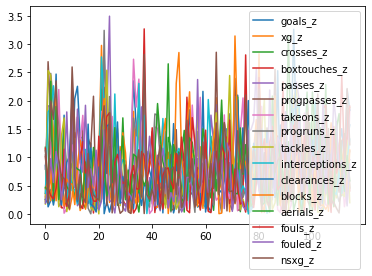

In [25]:
z.plot()

<AxesSubplot:>

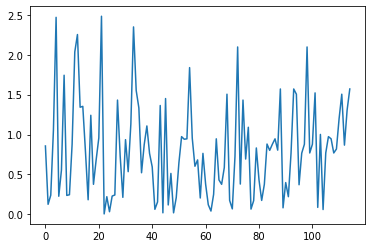

In [26]:
z.goals_z.plot()

In [28]:
z.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,115.0,0.804588,0.596432,0.005266,0.244129,0.769021,1.099452,2.482395
xg_z,115.0,0.803356,0.598105,0.024601,0.339445,0.599174,1.186947,2.974970
crosses_z,115.0,0.830452,0.559528,0.033401,0.449747,0.715349,1.180030,3.142912
boxtouches_z,115.0,0.775627,0.633953,0.016141,0.262433,0.668467,1.095929,3.266636
passes_z,115.0,0.771253,0.639315,0.049168,0.253934,0.568739,1.129446,3.491097
progpasses_z,115.0,0.784927,0.622300,0.007591,0.327807,0.684806,1.167104,2.854463
takeons_z,115.0,0.777077,0.632160,0.008415,0.264062,0.595518,1.148737,2.731396
progruns_z,115.0,0.791764,0.613501,0.002999,0.282107,0.642955,1.124448,3.240728
tackles_z,115.0,0.783851,0.623666,0.001784,0.294208,0.646858,1.121617,2.537740
interceptions_z,115.0,0.804270,0.596864,0.001925,0.357465,0.617088,1.131231,2.771879


In [33]:
threshold = 2.7
print(np.where(z > 2.7))

(array([21, 21, 22, 22, 24, 33, 37, 37, 50, 64, 71, 75, 80, 91, 93]), array([ 1,  9,  4,  7,  4,  6,  3, 15, 11,  5, 11,  3, 11,  2, 10]))


In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

goals_z             0.427692
xg_z                0.310769
crosses_z           0.327692
boxtouches_z        0.350769
passes_z            0.430000
progpasses_z        0.307692
takeons_z           0.344615
progruns_z          0.496538
tackles_z           0.505385
interceptions_z     0.522308
clearances_z        0.293462
blocks_z            0.358077
aerials_z           0.341538
fouls_z             0.446538
fouled_z            0.320385
nsxg_z              0.405000
results            18.000000
dtype: float64


In [35]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     goals_z   xg_z  crosses_z  boxtouches_z  passes_z  progpasses_z  \
0      False  False      False         False     False         False   
1      False  False      False         False     False         False   
2      False  False      False         False     False         False   
3      False  False      False         False     False         False   
4      False  False      False         False     False         False   
..       ...    ...        ...           ...       ...           ...   
110    False  False      False         False     False         False   
111    False  False      False         False     False         False   
112    False  False      False         False     False         False   
113    False  False      False         False     False         False   
114    False  False      False         False     False         False   

     takeons_z  progruns_z  tackles_z  interceptions_z  clearances_z  \
0        False       False      False            False         

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [37]:
df.isnull().sum()

goals_z            0
xg_z               0
crosses_z          0
boxtouches_z       0
passes_z           0
progpasses_z       0
takeons_z          0
progruns_z         0
tackles_z          0
interceptions_z    0
clearances_z       0
blocks_z           0
aerials_z          0
fouls_z            0
fouled_z           0
nsxg_z             0
results            0
dtype: int64

In [39]:
df_z = df[(z < 2.7).all(axis=1)]

In [40]:
df_z.shape

(103, 17)

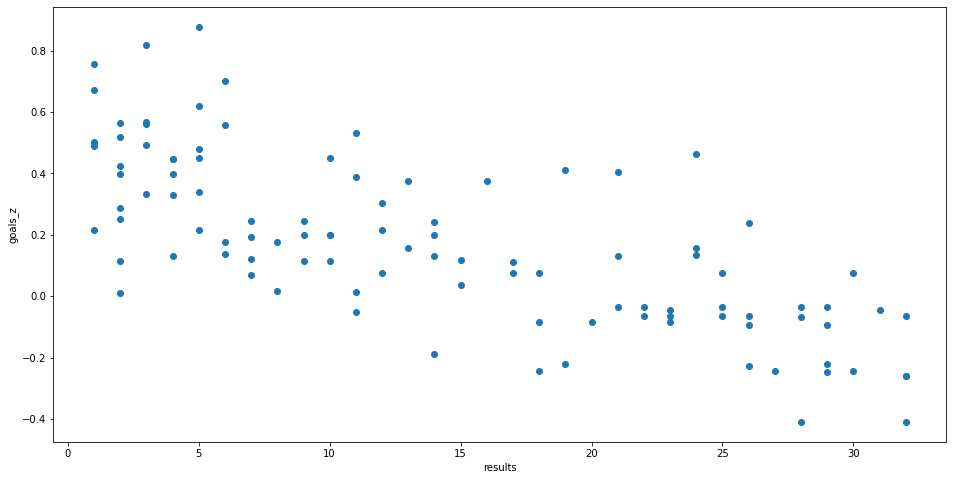

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['results'], df_z['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
y = df_z['results']

In [49]:
X = df_z.drop(columns=['results'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=112)

In [77]:
reg = LinearRegression().fit(X_train, y_train)

In [78]:
predictions = reg.predict(X_test)

In [79]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.46433896397576513
RMSE : 7.126839482067108


# 46%

In [80]:
import eli5
from eli5.sklearn import PermutationImportance

In [81]:
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are goals_z & passes_z 

Weight,Feature
0.8086 ± 0.3321,goals_z
0.2197 ± 0.1513,passes_z
0.0393 ± 0.0383,fouls_z
0.0195 ± 0.0297,crosses_z
0.0066 ± 0.0093,takeons_z
0.0034 ± 0.0119,clearances_z
0.0020 ± 0.0213,boxtouches_z
-0.0001 ± 0.0234,xg_z
-0.0011 ± 0.0175,blocks_z
-0.0018 ± 0.0071,progpasses_z


## Ridge Regression


In [82]:
from sklearn.linear_model import Ridge

In [83]:
clf = Ridge(alpha=1.0)

In [84]:
clf.fit(X_train, y_train)

Ridge()

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [86]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

6.412261559005032
0.5756107172437266


In [87]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

7.120516807974279
0.46528898055347


## 46%-57%

# Lasso

In [88]:
from sklearn import linear_model


In [89]:
clf = linear_model.Lasso(alpha=0.1)

In [90]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [91]:
print(clf.coef_)

[-24.09001537  -0.           0.67468819   0.           1.11321119
   0.          -0.           0.          -1.23538156  -1.04987121
  -0.12347372   0.          -1.31034104   0.75306687  -0.
   0.        ]


In [92]:
print(clf.intercept_)

18.316142609218304


In [93]:
model_lasso = linear_model.Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

6.417004409736624
0.5749826831579812
7.048092798256035
0.47611094000054033


## 47%-57%

## Elastic Net

In [94]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [95]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [96]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [97]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [98]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [99]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [100]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5.576844286623707
MSE: 48.71355972738898
RMSE: 6.979509991925578
R2 Square 0.48625693897602484
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.627443216342131
MSE: 44.54010886421155
RMSE: 6.673837641433266
R2 Square 0.5402801842593472
__________________________________


In [101]:
regr = ElasticNet(random_state=0)

In [102]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [103]:
print(regr.coef_)

[-2.45690645 -0.39932489  0.         -0.         -0.         -0.
 -0.         -0.         -0.92889398 -0.39355799 -0.         -0.
 -0.          0.         -0.         -0.        ]


In [104]:
print(regr.intercept_)

14.722251666264654
